**Chapter2 Supedvised Learning**


**2.3.8 Neural Network(Deep Learning)**

In [1]:
import graphviz
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'relu(x), tanh(x)')

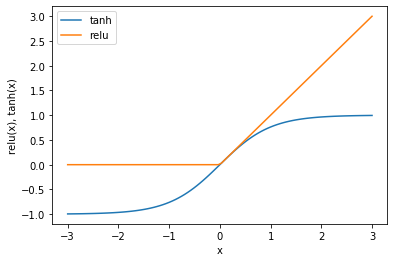

In [2]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

**신경망 튜닝**

Text(0, 0.5, 'Feature 1')

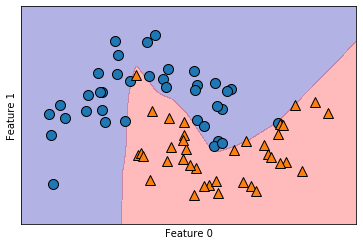

In [3]:
# Multi layer perceptron 
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

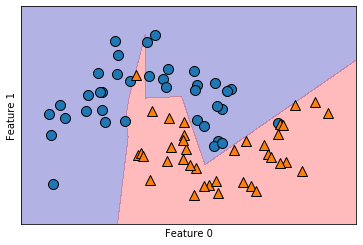

In [4]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

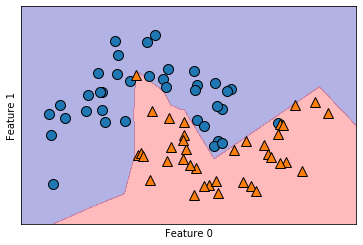

In [5]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 2')

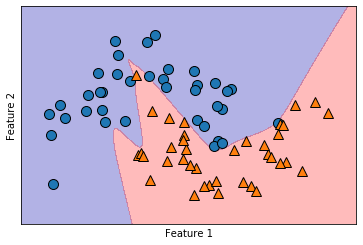

In [6]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 2개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


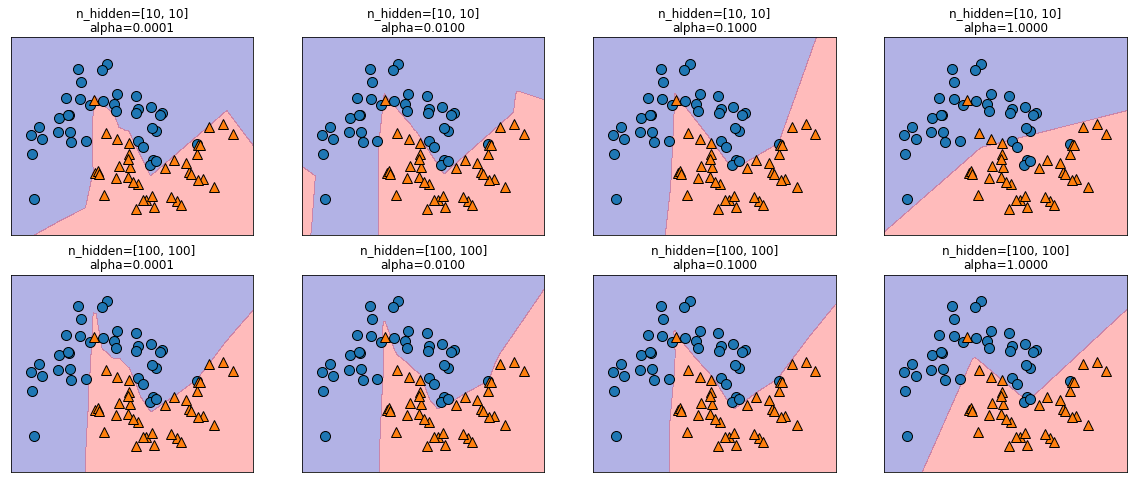

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={:.4f}'.format(n_hidden_nodes, n_hidden_nodes, alpha))

신경망의 복잡도를 제어하는 방법이 많다.

은닉층의 수, 은닉층의 유닛 개수, 규제(alpha)등이 있다. 여기서 alpha는 L2 패널티를 사용해서 가중치를 0에 가깝게 감소시켜 모델의 복잡도를 제어하는 것.

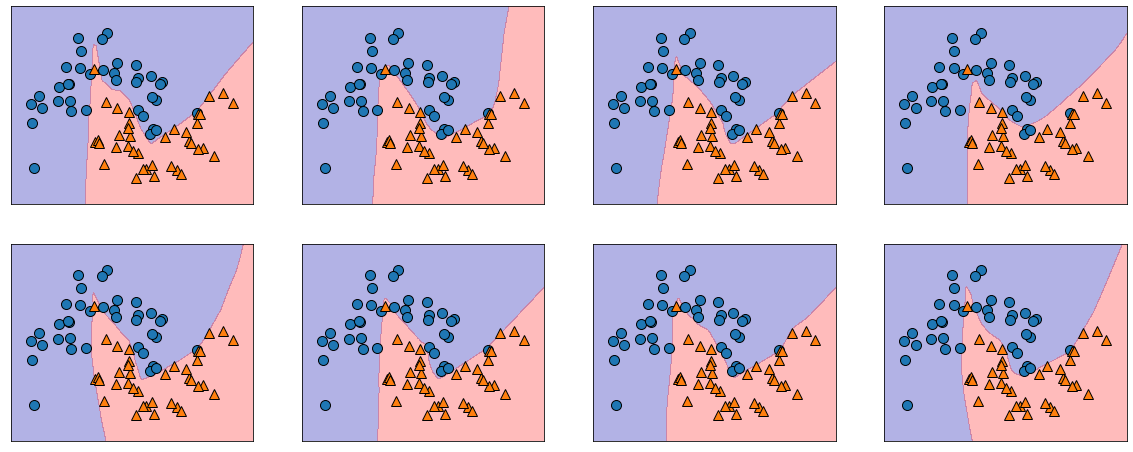

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

신경망에서, 학습을 시작하기 전에 가중치를 무작위로 설정하며 이 무작위한 초기화가 모델의 학습에 영향을 준다.

따라서 같은 매개변수를 사용하더라도 초깃값이 다르면 모델이 많이 달라질 수 있다. 신경망이 크고 복잡도도 적절하면 이런 점이 정확도에 미치는 영향은 크지 않지만 항상 기억하고 있어야 한다.

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print('유방암 데이터의 특성별 최댓값: \n{}'.format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최댓값: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Train Set Accuracy: {}".format(mlp.score(X_train, y_train)))
print("Test Set Accuracy: {}".format(mlp.score(X_test, y_test)))

Train Set Accuracy: 0.9389671361502347
Test Set Accuracy: 0.916083916083916


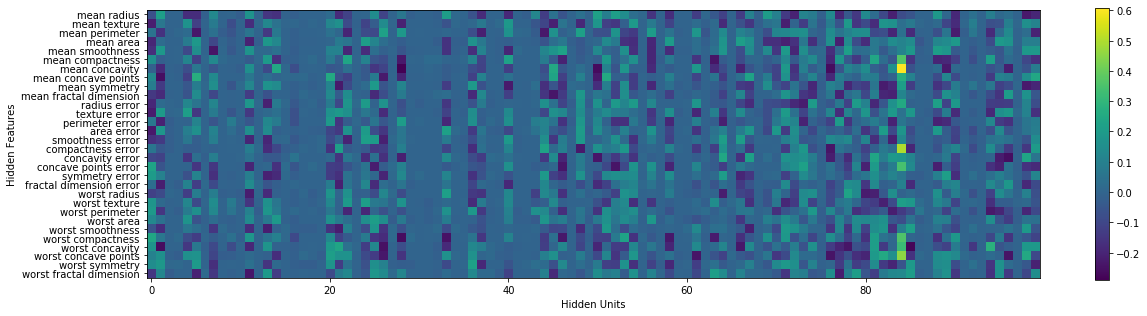

In [12]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Hidden Units')
plt.ylabel('Hidden Features')
plt.colorbar()

**장단점과 매개변수**

신경망은 데이터 전처리에 주의를 해야 한다. SVM과 비슷하게 모든 특성이 같은 의미를 가진 동질의 데이터에서 잘 작동한다.

다른 종류의 특성을 가진 데이터라면 트리 기반 모델이 더 잘 작동할 수 있다.

**신경망의 복잡도 추정**

신경망에서 가장 중요한 매개변수는 은닉층의 개수와 은닉층의 유닛 수.

유닛 수는 보통 입력 특성의 수와 비슷하게 설정.

신경망의 모델 복잡도에 관해 도움이 될 만한 측정치는 학습된 가중치 또는 계수의 수이다. 


In [13]:
# 2.4 분류 예측의 불확실성 추청

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, Y = make_circles(noise=0.25, factor=0.5, random_state=1)

In [15]:
# 예제를 위해 클래스의 이름을 "blue"와 "red"로 바꾼다.
y_named = np.array(["blue", "red"])[y]

# 여러 배열을 한꺼번에 train_test_split에 넣을 수 있다.
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# Gradient Boosting Model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**2.4.1 결정함수**

이진 분류에서 decision_function반환값의 크기는 (n_samples,)이며 각 샘플이 하나의 실수값을 반환한다.

In [16]:
print("X_test.shape: {}".format(X_test.shape))
print("결정 함수 결과 형태: {}".format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [17]:
# 결정함수 결과 중 앞부분 일부를 확인
print("결정함수: \n{}".format(gbrt.decision_function(X_test)[:6]))

결정함수: 
[-0.4597353  -2.94273478  1.59119759  0.87433974  2.56993729  0.77445613]


In [18]:
print("임계치와 결정 함수 결과 비교:\n{}".format(gbrt.decision_function(X_test) > 0))
print("예측: \n{}".format(gbrt.predict(X_test)))

임계치와 결정 함수 결과 비교:
[False False  True  True  True  True  True False False  True False False
  True  True  True False False False False False False False  True False
 False]
예측: 
['blue' 'blue' 'red' 'red' 'red' 'red' 'red' 'blue' 'blue' 'red' 'blue'
 'blue' 'red' 'red' 'red' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'red' 'blue' 'blue']


In [20]:
# Boolean 값을 0과 1로 변환
greater_zero = (gbrt.decision_function(X_test) >0).astype(int)
# classes_에 인덱스로 사용한다.
pred = gbrt.classes_[greater_zero]
# pred와 gbrt.predict의 결과를 비교
print("pred는 예측 결과와 같다: {}".format(np.all(pred == gbrt.predict(X_test))))

pred는 예측 결과와 같다: True


In [21]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값: {:.2f} 최댓값: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값: -2.94 최댓값: 2.88


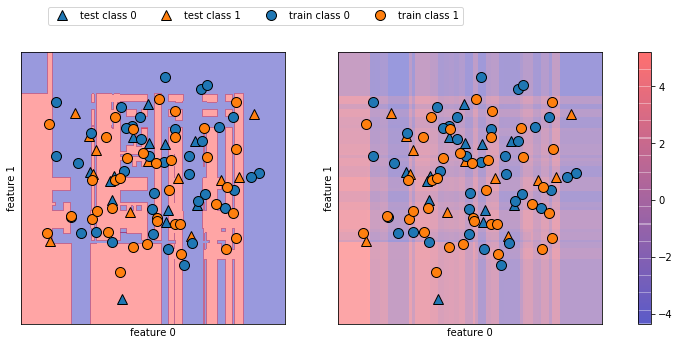

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # 훈련 포인트와 테스트 포인트 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["test class 0", "test class 1", "train class 0", "train class 1"], ncol=4, loc=(.1, 1.1))

**2.4.2 예측 확률**

In [26]:
print("확률 값의 형태: {}".format(gbrt.predict_proba(X_test).shape))

확률 값의 형태: (25, 2)


In [27]:
# predict_proba 결과 중 앞부분 일부를 확인
print("Forecast Ratio: {}".format(gbrt.predict_proba(X_test[:6])))

Forecast Ratio: [[0.61295138 0.38704862]
 [0.94991899 0.05008101]
 [0.16921547 0.83078453]
 [0.2943521  0.7056479 ]
 [0.07109845 0.92890155]
 [0.31551594 0.68448406]]


두 클래스의 확률 값은 1이므로 두 클래스 중 하나는 50%이상의 확인을 가짐. 그리고 바로 그 클래스가 예측값이 된다.

일반적으로 복잡도가 낮은 모델은 예측에 불확실성이 더 많다. 이런 불확실성과 모델의 정확도가 동등하다면 이 모델이 보정(calibration)되었다고 한다.

즉 보정된 모델에서 70%확신을 가진 예측은 70%의 정확도를 내보낼 것이다.

다음 예에서 앞에서와 같은 데이터셋을 사용하여 결정 경계와 클래스 1의 확률을 그리면 아래와 같다.

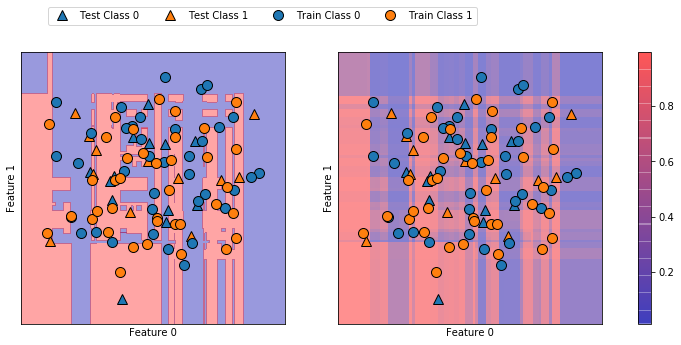

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test Class 0", "Test Class 1", "Train Class 0", "Train Class 1"], ncol=4, loc=(.1, 1.1))

이 그래프의 경계는 훨씬 더 잘 나타나있으며, 불확실성이 작은 영역들도 잘 확인할 수 있다.

**2.4.3 다중 분류에서의 불확실성**



In [31]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print("결정함수의 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
# decision function 결과 중 앞부분 일부를 확인
print("결정 함수 결과: \n{}".format(gbrt.decision_function(X_test)[:6, :]))

결정함수의 결과 형태: (38, 3)
결정 함수 결과: 
[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


다중 분류에서는 decision_function의 결괏값의 크기는 (n_samples, n_classes)이다. 각 열은 각 클래스에 대한 확신 점수를 담고 있다. 

In [32]:
print("가장 큰 결정 함수의 인덱스:".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print("예측: \n{}".format(gbrt.predict(X_test)))

가장 큰 결정 함수의 인덱스:
예측: 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


predict_proba의 출력값 크기는 (n_samples, n_classes)로 앞서 본것과 같다. 마찬가지로 각 데이터 포인트에서의 클래스 확률의 합은 1이다.

In [33]:
print("Forecast Ratio: {}".format(gbrt.predict_proba(X_test)[:6]))
print("합: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Forecast Ratio: [[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
합: [1. 1. 1. 1. 1. 1.]


In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# iris데이터셋의 타깃을 클래스 이름으로 나타내기

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스의 종류: {}".format(logreg.classes_))
print("예측: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스: {}".format(argmax_dec_func[:10]))
print("인덱스를 classes_에 연결: {}".format(logreg.classes_[argmax_dec_func][:10]))

훈련 데이터에 있는 클래스의 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


**2.5 요약 및 정리**

모델에 대한 간단한 요약

1. 최근접 이웃: 작은 데이터셋일 경우, 기본모델로서 좋고 설명하기 쉬움
1. 선형 모델: 첫 번째로 시도할 알고리즘. 대용량 데이터셋 가능. 고차원 데이터에 가능.
1. 나이브 베이즈: 분류만 가능. 선형모델보다 훨씬 빠름. 대용량 데이터셋과 고차원 데이터에 가능. 선형 모델보다 덜 정호가함.
1. 결정트리: 매우 빠름. 데이터 스케일 조정이 필요 없음. 시각화 하기 좋고 설명하기 편함
1. 랜덤 포레스트: 결정 트리 보다 거의 항상 좋은 성능. 매우 안정적. 데이터 스케일 조정 필요 없음. 고차원 희소 데이터에는 잘 안 맞음.
1. 그래디언트 부스팅 결정 트리: 랜덤포레스트보다 학습은 느리나 예측은 빠름. 메모리를 덜 사용. 
1. 서포트 벡터 머신: 비슷한 의미의 특성으로 이뤄진 중간 규모 데이터셋에 잘 맞음. 곧 데이터 스케일 조정 필요. 매개변수에 민감.
1. 신경망: 특별히 대용량 데이터셋에서 매우 복잡한 모델을 만들 수 있음. 매개변수 선택과 데이터 스케일에 민감. 큰 모델은 학습이 오래 걸림.